# **Algoritma *K-Means***

## **Pengertian *K-Means Clustering***

K-Means Clustering adalah salah satu metode unsupervised learning yang digunakan untuk mengelompokkan data ke dalam sejumlah cluster (kelompok) berdasarkan kemiripan karakteristiknya. Tujuan utama dari algoritma ini adalah meminimalkan jarak antara data dalam satu cluster terhadap pusat cluster-nya (centroid), sehingga data yang serupa berada dalam satu kelompok.

## **Manfaat *Clustering***

Berikut versi singkat dan rapi dari **manfaat *clustering***:

---

## **Manfaat *Clustering*** (Pengelompokan Data)

1. **Menemukan Pola Tersembunyi**
   Mengidentifikasi struktur dalam data tanpa label.

2. **Segmentasi Pasar**
   Mengelompokkan pelanggan untuk strategi pemasaran yang tepat.

3. **Penyederhanaan Data**
   Mengurangi kompleksitas dengan membagi data ke dalam kelompok.

4. **Deteksi Anomali**
   Mendeteksi data yang menyimpang dari pola umum.

5. **Sistem Rekomendasi**
   Personalisasi berdasarkan kelompok pengguna/item yang mirip.

6. **Pengurangan Dimensi**
   Membantu merangkum data sebelum analisis lebih lanjut.

7. **Analisis Sosial & Biologi**
   Digunakan untuk mengelompokkan gen, dokumen, atau pengguna.



# **Inertia (Sum Square error/SSE)**


Dalam konteks algoritma *K-Means Clustering*, *inertia* (Sum Square error/SSE) adalah salah satu metrik evaluasi untuk menilai seberapa baik data dikelompokkan ke dalam klaster serta mengukur jumlah total jarak kuadrat antara setiap titik data dan pusat klaster (centroid) tempat titik tersebut.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## **Silhouette Analysis**

Silhouette Analysis adalah metode untuk mengukur seberapa baik objek telah dikelompokkan dalam proses clustering. Ini membantu mengevaluasi kualitas hasil clustering.

Silhouette Analysis mengukur seberapa mirip suatu titik data dengan klasternya sendiri dibandingkan dengan klaster terdekat lainnya. Rumusnya adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data

## **Implementasi dengan menggunakan data Iris**

In [7]:
%pip install pymysql
%pip install psycopg2

## **Library yang digunakan**

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Pengumpulan Data**

In [9]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-2784e994-malikaauliaaa2-1544.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_7OwV6So2k6qKTb1yXO0",
        database="defaultdb",
        port=26315
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel2")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-a971b40-malikaauliaaa2-1544.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_xWwDDfEtRsiv7WGcUgO",
        database="defaultdb",
        port=26315
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel1")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          12.0         10.0           5.1          3.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa          17.0         20.0           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa          10.0         14.0          54.0         39.0
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           9.0          5.0           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa          20.0         10.0          54.0         37.0
 12     Iris-setosa           1.6          0.2          48.0         34.0
 13     Iris-setosa           1.4     

## **Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 2,3 dan 4**

In [10]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[ 2.94308463  2.9668164   0.67188051  0.39259671]
 [-0.3270094  -0.32964627 -0.07465339 -0.04362186]]
Akurasi (Adjusted Rand Score): -0.003

Hasil K-Means dengan 3 Klaster:
Centroids:
[[ 2.86522963  2.97631784  0.31370931  0.12787436]
 [-0.32585863 -0.33036664 -0.27075339 -0.27456187]
 [ 0.09449721 -0.00422534  2.97229964  3.28045546]]
Akurasi (Adjusted Rand Score): -0.002

Hasil K-Means dengan 4 Klaster:
Centroids:
[[ 2.88056025  2.92408146  0.07586974 -0.00591279]
 [-0.32585863 -0.33036664 -0.27075339 -0.27456187]
 [-0.34312028 -0.31956109  2.67074657  3.18953833]
 [ 3.34949304  3.24459355  4.54595053  2.98290848]]
Akurasi (Adjusted Rand Score): -0.002


## **Model Plotting dengan Jumlah Cluster 2, 3 dan 4**

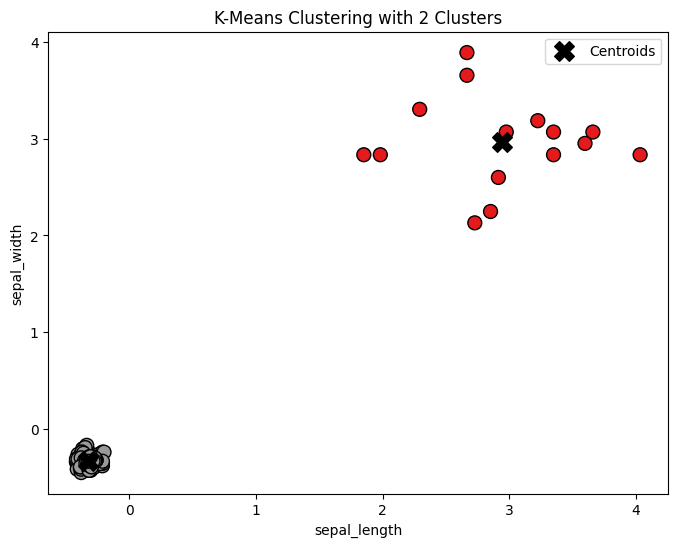

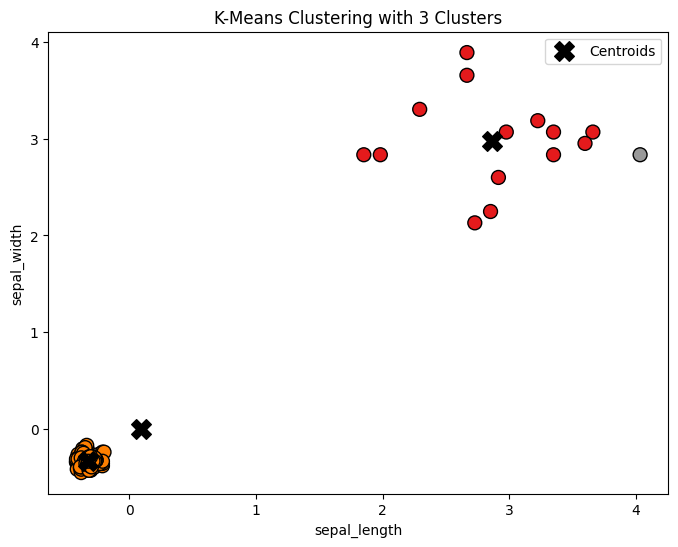

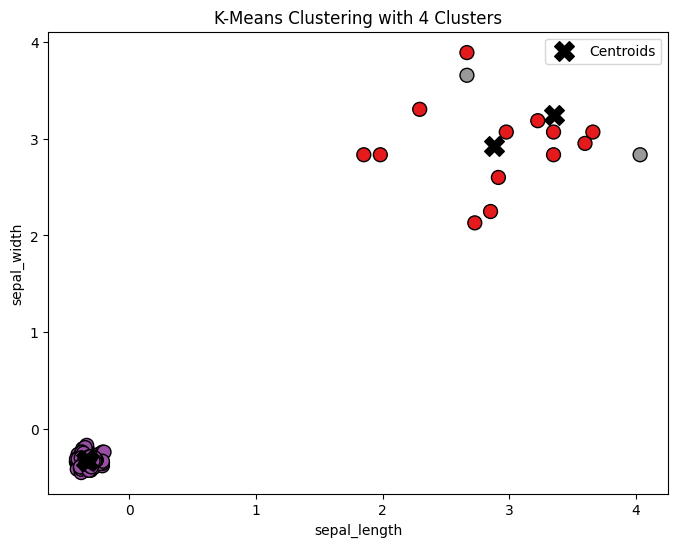

In [11]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means, plotting dan menampilkan centroid
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Plotting data dan centroid
    plt.figure(figsize=(8, 6))

    # Scatter plot untuk 2 fitur pertama (sepal length & sepal width)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', marker='o', edgecolors='k', s=100)

    # Plot centroid dengan warna berbeda
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Melakukan clustering dengan K=2, K=3, dan K=4 dan plot hasilnya
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)


## **Menghitung Inertia untuk Jumlah Cluster 2,3 dan 4**

In [12]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2
        inertia += distance
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 4. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 5. Jalankan untuk k=2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[ 2.94308463  2.9668164   0.67188051  0.39259671]
 [-0.3270094  -0.32964627 -0.07465339 -0.04362186]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [-0.37281033 -0.27652519  1.58110102  1.8671073 ]), Klaster: 1, Centroid: [-0.3270094  -0.32964627 -0.07465339 -0.04362186], Jarak kuadrat: 6.397, Inertia sementara: 6.397
Titik data 2 (Fitur: [ 1.85187182  2.83379636  2.03723172 -0.11653923]), Klaster: 0, Centroid: [2.94308463 2.9668164  0.67188051 0.39259671], Jarak kuadrat: 3.332, Inertia sementara: 9.729
Titik data 3 (Fitur: [-0.39766711 -0.31173638  2.72142776  4.34666547]), Klaster: 1, Centroid: [-0.3270094  -0.32964627 -0.07465339 -0.04362186], Jarak kuadrat: 27.098, Inertia sementara: 36.827
Titik data 4 (Fitur: [-0.40388131 -0.32347344 -0.81358511 -0.5628597 ]), Klaster: 1, Centroid: [-0.3270094  -0.32964627 -0.07465339 -0.04362186], Jarak kuadrat: 0.822, Inertia sementara: 37.649
Titik data 

## **Model Plotting Diagram Elbow Method**

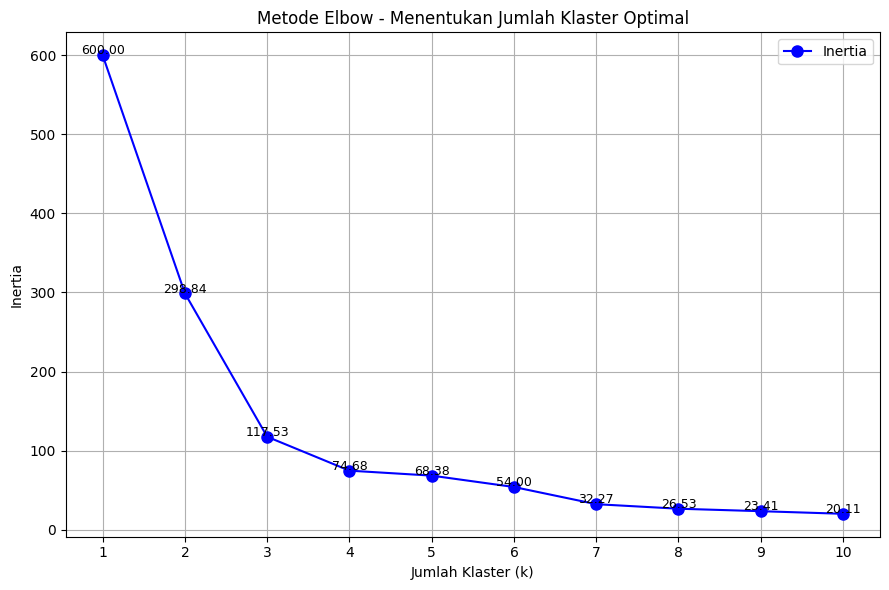

In [13]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

## **Menghitung Silhouette Score untuk Jumlah Cluster 2,3 dan 4**


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[ 2.94308463  2.9668164   0.67188051  0.39259671]
 [-0.3270094  -0.32964627 -0.07465339 -0.04362186]]
Silhouette Score untuk 2 klaster: 0.774

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[ 2.86522963  2.97631784  0.31370931  0.12787436]
 [-0.32585863 -0.33036664 -0.27075339 -0.27456187]
 [ 0.09449721 -0.00422534  2.97229964  3.28045546]]
Silhouette Score untuk 3 klaster: 0.825

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[ 2.88056025  2.92408146  0.07586974 -0.00591279]
 [-0.32585863 -0.33036664 -0.27075339 -0.27456187]
 [-0.34312028 -0.31956109  2.67074657  3.18953833]
 [ 3.34949304  3.24459355  4.54595053  2.98290848]]
Silhouette Score untuk 4 klaster: 0.827

>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = 4 (dengan score = 0.827)


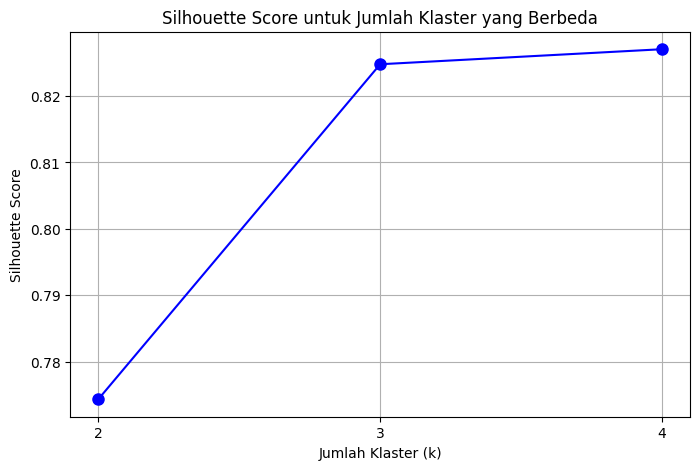

In [14]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means dan menghitung Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Output hasil untuk klaster k
    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Melakukan clustering dan menghitung Silhouette Score untuk k=2, 3, dan 4
silhouette_scores = []
k_values = [2, 3, 4]

for k in k_values:
    score = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(score)

# 5. Menentukan k dengan Silhouette Score terbaik
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = {best_k} (dengan score = {best_score:.3f})")

# 6. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()